In [ ]:
#Original Solutions Prepared By Me(After Reading from All possible Materials)
#Garima Singh
#Started at 2:32pm


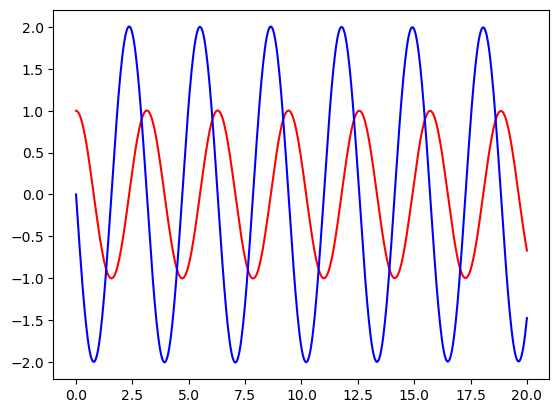

In [9]:
#SHO d^2x/dt^2 = - k^2*x
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
def sho(t,x,k_sq):
    dxdt=x[1]
    dvdt=-k_sq*x[0]
    return [dxdt,dvdt]
k=2
k_sq=k**2
t=np.linspace(0,20,500)
x0=np.array([1,0])
y_out=solve_ivp(sho, t_span=[0,20],y0=x0,t_eval=t,method="BDF",args=(k_sq,))
plt.plot(y_out.t,y_out.y[0],'r')#position
plt.plot(y_out.t,y_out.y[1],'b')#velocity 

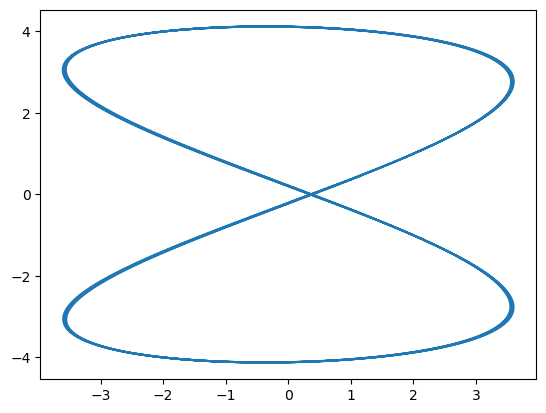

In [16]:
#Lissajous Figures 
#d^2x/dt^2=-k1^2*x
#d^2y/dt^2=-k2^2*y
def lissajous(t,x,k1,k2):
    dxdt=x[1]
    d2xdt=-(k1)*x[0]
    dydt=x[3]
    d2ydt=-(k2)*x[2]
    return [dxdt,d2xdt,dydt,d2ydt]
x01=np.array([2,3,1,2])
t1=np.linspace(0,50,2000)
y_out=solve_ivp(lissajous,t_eval=t1,t_span=[0,50],y0=x01,args=(1,1/4),method="BDF")
plt.plot(y_out.y[0],y_out.y[2])

# 🦌🦊 Predator-Prey Simulation (Lotka-Volterra Model)

## 📝 Problem Description

Assume a hypothetical isolated island inhabited only by foxes (predator, $y$) and rabbits (prey, $x$). The population dynamics on the island are described by the **Lotka-Volterra equations** (a system of coupled non-linear ordinary differential equations):

$$\frac{dx}{dt} = \alpha x - \beta xy$$

$$\frac{dy}{dt} = -\gamma y + \delta xy$$

### **Given Parameters**

| Parameter | Description | Value |
| :---: | :---: | :---: |
| $\alpha$ | Rabbit growth rate | $0.1$ |
| $\beta$ | Predation rate | $0.002$ |
| $\gamma$ | Fox death rate | $0.2$ |
| $\delta$ | Fox growth rate | $0.0025$ |

### **Task**

1.  Find the change in population density (in $\mathrm{km}^{-2}$) for both rabbits and foxes over a span of **100 years** for the following five initial conditions ($x(t_0), y(t_0)$):

| Case | Rabbits $x(t_0)$ ($\mathrm{km}^{-2}$) | Foxes $y(t_0)$ ($\mathrm{km}^{-2}$) |
| :---: | :---: | :---: |
| **(a)** | $20$ | $0$ |
| **(b)** | $20$ | $20$ |
| **(c)** | $0$ | $8$ |
| **(d)** | $8$ | $8$ |
| **(e)** | $8$ | $20$ |

2.  Define a single Python function that:
    * Solves the ODE system for all five cases.
    * Plots the population density for both species against time on a single figure for all five cases.
3.  Interpret the results for each case, particularly in relation to the equilibrium point $(x^*, y^*)$.

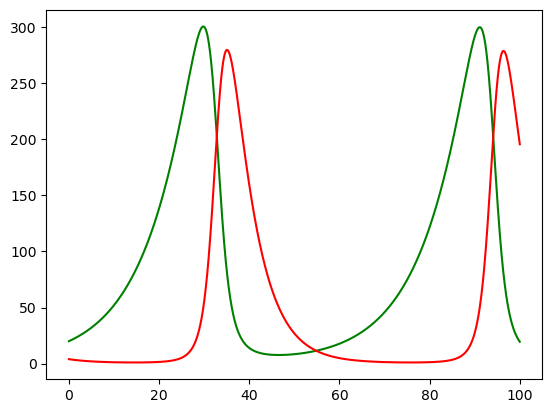

In [17]:

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
def func1(t,x):
    x_1 = 0.1*x[0]-0.002*x[0]*x[1]
    y_1 = -0.2*x[1]+0.0025*x[0]*x[1]
    return np.array([x_1,y_1])
t = np.linspace(0,100,10000)
x0 = np.array([20,4])
x111=np.array([20,0])
x222=np.array([20,20])
x333=np.array([0,8])
x433=np.array([8,8])
x533=np.array([8,20])
y_out = solve_ivp(func1, t_span = [0,100], y0 = x0, method='BDF', t_eval=t)
y_out1=solve_ivp(func1, t_span = [0,100], y0 = x111, method='BDF', t_eval=t)
y_out2=solve_ivp(func1, t_span = [0,100], y0 = x222, method='BDF', t_eval=t)
y_out3=solve_ivp(func1, t_span = [0,100], y0 = x333, method='BDF', t_eval=t)
y_out4=solve_ivp(func1, t_span = [0,100], y0 = x433, method='BDF', t_eval=t)
y_out5=solve_ivp(func1, t_span = [0,100], y0 = x533, method='BDF', t_eval=t)
plt.plot(y_out.t,y_out.y[0],'g',label="Population density of Rabbits")
plt.plot(y_out.t,y_out.y[1],'r',label="Population density of Foxes")

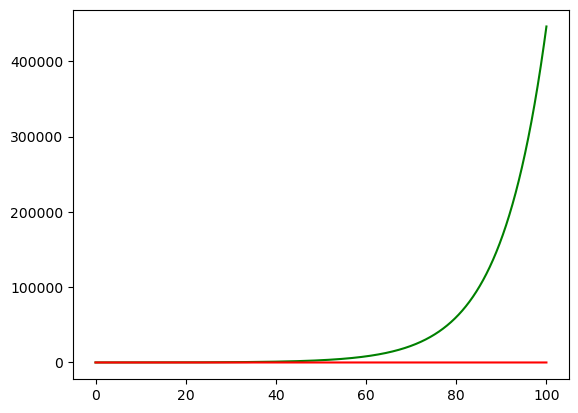

In [18]:
plt.plot(y_out.t,y_out1.y[0],"g")
plt.plot(y_out.t,y_out1.y[1],"r")

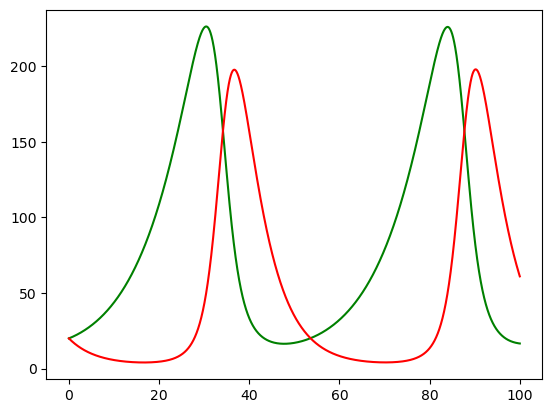

In [19]:
plt.plot(y_out.t,y_out2.y[0],'g')
plt.plot(y_out.t,y_out2.y[1],'r')

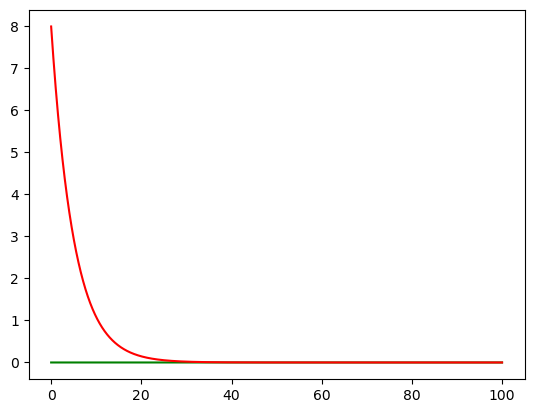

In [20]:
plt.plot(y_out.t,y_out3.y[0],'g')
plt.plot(y_out.t,y_out3.y[1],'r')

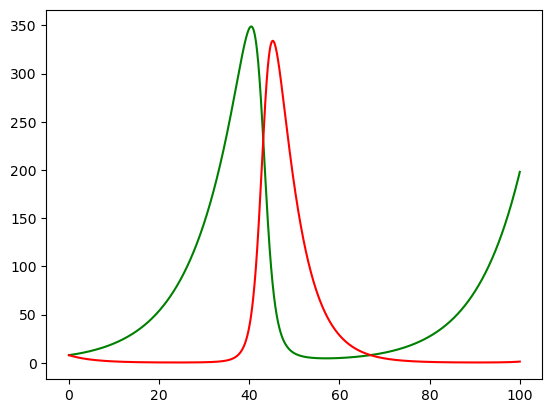

In [21]:
plt.plot(y_out.t,y_out4.y[0],'g')
plt.plot(y_out.t,y_out4.y[1],'r')

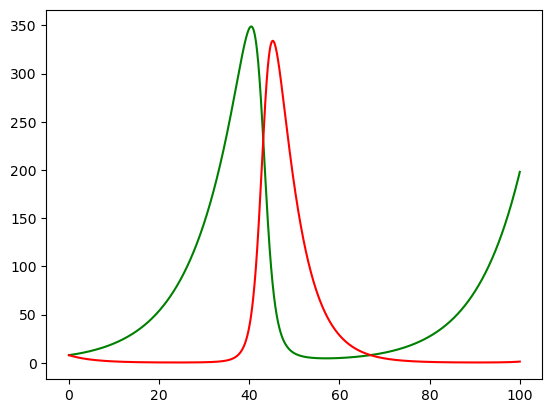

In [22]:
plt.plot(y_out.t,y_out4.y[0],'g')
plt.plot(y_out.t,y_out4.y[1],'r')

# 🔬  Virus Spread Simulation (Compartmental Model)

## 📝 Problem Description

The spread of a viral infection in a body with an initial infection is approximated with balance equations on the number of **healthy cells ($H$)**, **infected cells ($I$)**, and **virus count ($V$)**, which are governed by the following system of Ordinary Differential Equations (ODEs):

$$
\begin{aligned}
\frac{dH}{dt} &= r_1 - r_2 H - r_3 H V \\
\frac{dV}{dt} &= -r_3 H V - r_4 V + r_5 I \\
\frac{dI}{dt} &= r_3 H V - r_6 I
\end{aligned}
$$

**Given Parameters (Rates per Month):**

| Parameter | Description | Value |
| :---: | :---: | :---: |
| $r_1$ | Growth rate of healthy cells | $10^5$ |
| $r_2$ | Death rate of healthy cells | $0.1$ |
| $r_3$ | Rate of conversion of healthy cells into infected cells | $2 \times 10^{-7}$ |
| $r_4$ | Death rate of virus | $5$ |
| $r_5$ | Production of virus by infected cells | $100$ |
| $r_6$ | Death rate of infected cells | $0.5$ |

**Initial Conditions (at $t=0$):**
$$H(0) = 10^6, \quad V(0) = 100, \quad I(0) = 0$$

**Tasks:**
1.  **Plot** the healthy cell, infected cell, and virus count over the course of **15 months**.
2.  **Create a dictionary** (`dict = {'time':[], 'healthy cells':[], 'virus count':[], 'infected cells':[]}`) and store the output of the differential equation in this dictionary.
3.  **Save** the output as both a **pickle** file and a **NumPy** file.
4.  **Load** the pickle file that you have saved, and using `matplotlib`, **plot** the change of $I, H, \text{ and } V$ with time.

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import pickle 
import matplotlib.pyplot as plt
r1=10**5
r2=0.1
r3=2*(10**-7)
r4=5
r5=100
r6=0.5
def f(t,x):
    hdot=r1-r2*x[0]-r3*x[0]*x[1]
    vdot=-r3*x[0]*x[1]-r4*x[1]+r5*x[2]
    idot=r3*x[0]*x[1]-r6*x[2]
    return [hdot,vdot,idot]

sol = solve_ivp(f, t_span=[0,15], y0= np.array([10**6,100,0]), t_eval=np.linspace(0,15,100),method="LSODA")
dict1 = {"time":[sol.t], "healthy cells":[sol.y[0]], "virus cells":[sol.y[1]], "infected cells":[sol.y[2]]}

with open("task1.pkl", "wb") as f:
    pickle.dump(dict1, f, protocol=pickle.HIGHEST_PROTOCOL)

pickle.load(open("task1.pkl", "rb"))

np.save('task1.npy', dict1, allow_pickle=True)
temp_file= np.load('task1.npy', allow_pickle=True)
print(temp_file)


sol_from_pickle= pickle.load(open("task1.pkl", "rb"))
plt.plot(sol_from_pickle["time"][0], sol_from_pickle["healthy cells"][0], label="h(t)")
plt.plot(sol_from_pickle["time"][0], sol_from_pickle["virus cells"][0], label="v(t)")
plt.plot(sol_from_pickle["time"][0],sol_from_pickle["infected cells"][0], label="i(t)")
plt.xlabel("t")
plt.legend(loc="upper right")

{'time': [array([ 0.        ,  0.15151515,  0.3030303 ,  0.45454545,  0.60606061,
        0.75757576,  0.90909091,  1.06060606,  1.21212121,  1.36363636,
        1.51515152,  1.66666667,  1.81818182,  1.96969697,  2.12121212,
        2.27272727,  2.42424242,  2.57575758,  2.72727273,  2.87878788,
        3.03030303,  3.18181818,  3.33333333,  3.48484848,  3.63636364,
        3.78787879,  3.93939394,  4.09090909,  4.24242424,  4.39393939,
        4.54545455,  4.6969697 ,  4.84848485,  5.        ,  5.15151515,
        5.3030303 ,  5.45454545,  5.60606061,  5.75757576,  5.90909091,
        6.06060606,  6.21212121,  6.36363636,  6.51515152,  6.66666667,
        6.81818182,  6.96969697,  7.12121212,  7.27272727,  7.42424242,
        7.57575758,  7.72727273,  7.87878788,  8.03030303,  8.18181818,
        8.33333333,  8.48484848,  8.63636364,  8.78787879,  8.93939394,
        9.09090909,  9.24242424,  9.39393939,  9.54545455,  9.6969697 ,
        9.84848485, 10.        , 10.15151515, 10.30303

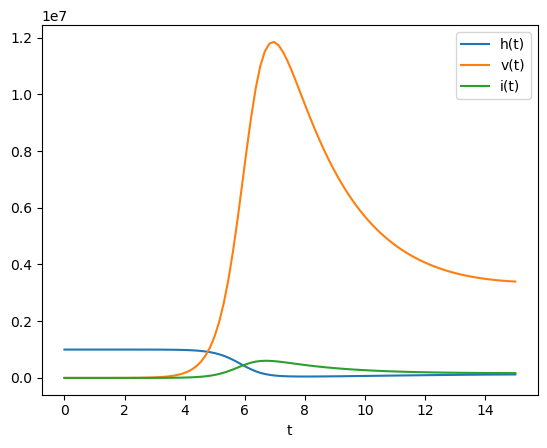

In [25]:
#TO BE DONE FOR EXAM PROPERLY--STORING IN PICKLE AND NUMPY AND PLOTTING FROM THE DATA STORED
from scipy.integrate import solve_ivp
import numpy as np
import pickle 
import matplotlib.pyplot as plt
r1=10**5
r2=0.1
r3=2*(10**-7)
r4=5
r5=100
r6=0.5
def f(t,x):
    hdot=r1-r2*x[0]-r3*x[0]*x[1]
    vdot=-r3*x[0]*x[1]-r4*x[1]+r5*x[2]
    idot=r3*x[0]*x[1]-r6*x[2]
    return [hdot,vdot,idot]

sol = solve_ivp(f, t_span=[0,15], y0= np.array([10**6,100,0]), t_eval=np.linspace(0,15,100),method="LSODA")
save_dict = {"time":[sol.t], "healthy cells":[sol.y[0]], "virus cells":[sol.y[1]], "infected cells":[sol.y[2]]}
with open("VIRUSSPREAD.pkl","wb") as g:
    pickle.dump(save_dict,g,protocol=pickle.HIGHEST_PROTOCOL)
pickle.load(open("VIRUSSPREAD.pkl","rb"))
np.save("VIRUSSPREAD.npy",save_dict,allow_pickle=True)
temp_file=np.load("VIRUSSPREAD.npy",allow_pickle=True)
print(temp_file)
sol_pickle=pickle.load(open("VIRUSSPREAD.pkl","rb"))
plt.plot(sol_pickle["time"][0], sol_pickle["healthy cells"][0], label="h(t)")
plt.plot(sol_pickle["time"][0], sol_pickle["virus cells"][0], label="v(t)")
plt.plot(sol_pickle["time"][0],sol_pickle["infected cells"][0], label="i(t)")
plt.xlabel("t")
plt.legend(loc="upper right")

# 📉  Series Summation, Data I/O, and Pandas

## Series Summation and CSV Creation

Consider the series $f(x, n)$, defined as:
$$f(x, n) = 1 + \frac{1}{x} + \frac{1}{x^2} + \frac{1}{x^3} + \dots + \frac{1}{x^n}$$

1.  Define a function that saves the different terms $1/x^k$ for $k \in [0, n]$ and the sum $f(x, n)$ in a list.
2.  Using the above defined function, write a Python script to create a **CSV file** called `series.csv` that saves the table below (in CSV format), for $x \in \{2, 10\}$ and $n=10$:

| Index (k) | $x=2$ | $\dots$ | $x=n$ | sum |
| :---: | :---: | :---: | :---: | :---: |
| 0 | 1 | $\dots$ | $\frac{1}{10^0}$ | $f(10, n)$ |
| 1 | $\frac{1}{2}$ | $\dots$ | $\frac{1}{10^1}$ | $\dots$ |
| 2 | $\frac{1}{2^2}$ | $\dots$ | $\frac{1}{10^2}$ | $\dots$ |
| $\dots$ | $\dots$ | $\dots$ | $\dots$ | $\dots$ |
| n | $\frac{1}{2^{10}}$ | $\dots$ | $\frac{1}{10^{10}}$ | $\dots$ |
| sum | $f(2, n)$ | $\dots$ | $\dots$ | $\dots$ |

**Note:** The last column $f(x, n)$ should be the actual sum. The first row and column serve as the indices/labels.

---

##  Data Analysis with Pandas

1.  **Import** the CSV file `series.csv` and print all the elements as a pandas dataframe.
2.  Using pandas, set the column $x$ as the index columns and print the list of elements for the powers $\{1, 2\}$ for $x=5$. (Note: The provided table uses $x \in \{2, 10\}$. You should adapt the code to handle $x=5$ as requested here, likely by including it in the original CSV creation if possible, or noting the discrepancy).

In [26]:
import csv
list=[]
def f(i,n):
    L=[]
    sum1=0
    L.append(i)
    for n in range(0,n+1):
        L.append((1/i)**n)
        sum1+=((1/i)**n)
    L.append(sum1)
    return L
L=f(2,10)
rows=[]
row1=["x",0,1,2,3,4,5,6,7,8,9,10,"sum"]
with open("series.csv", 'w') as csvfile:   
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(row1) 
    csvwriter.writerow(f(2,10))   
    csvwriter.writerow(f(3,10))              
    csvwriter.writerow(f(4,10))   
    csvwriter.writerow(f(5,10))   
    csvwriter.writerow(f(6,10))
    csvwriter.writerow(f(7,10))
    csvwriter.writerow(f(8,10))
    csvwriter.writerow(f(9,10))
    csvwriter.writerow(f(10,10))
with open("series.csv", mode='r')as file:
    f = csv.reader(file)
    for rows in f:
        print (rows)    

['x', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'sum']
[]
['2', '1.0', '0.5', '0.25', '0.125', '0.0625', '0.03125', '0.015625', '0.0078125', '0.00390625', '0.001953125', '0.0009765625', '1.9990234375']
[]
['3', '1.0', '0.3333333333333333', '0.1111111111111111', '0.03703703703703703', '0.012345679012345677', '0.004115226337448558', '0.0013717421124828527', '0.00045724737082761756', '0.0001524157902758725', '5.0805263425290837e-05', '1.693508780843028e-05', '1.499991532456096']
[]
['4', '1.0', '0.25', '0.0625', '0.015625', '0.00390625', '0.0009765625', '0.000244140625', '6.103515625e-05', '1.52587890625e-05', '3.814697265625e-06', '9.5367431640625e-07', '1.3333330154418945']
[]
['5', '1.0', '0.2', '0.04000000000000001', '0.008000000000000002', '0.0016000000000000003', '0.0003200000000000001', '6.400000000000002e-05', '1.2800000000000005e-05', '2.5600000000000013e-06', '5.120000000000002e-07', '1.0240000000000006e-07', '1.2499999744']
[]
['6', '1.0', '0.16666666666666666', '

In [3]:
import pandas as pd
df1 = pd.read_csv("series.csv")
df = pd.DataFrame(df1)
df

,x,0,1,2,3,4,5,6,7,8,9,10,sum
0,2,1.0,0.500000,0.250000,0.125000,0.062500,0.031250,0.015625,7.812500e-03,3.906250e-03,1.953125e-03,9.765625e-04,1.999023
1,3,1.0,0.333333,0.111111,0.037037,0.012346,0.004115,0.001372,4.572474e-04,1.524158e-04,5.080526e-05,1.693509e-05,1.499992
2,4,1.0,0.250000,0.062500,0.015625,0.003906,0.000977,0.000244,6.103516e-05,1.525879e-05,3.814697e-06,9.536743e-07,1.333333
3,5,1.0,0.200000,0.040000,0.008000,0.001600,0.000320,0.000064,1.280000e-05,2.560000e-06,5.120000e-07,1.024000e-07,1.250000
4,6,1.0,0.166667,0.027778,0.004630,0.000772,0.000129,0.000021,3.572245e-06,5.953742e-07,9.922903e-08,1.653817e-08,1.200000
5,7,1.0,0.142857,0.020408,0.002915,0.000416,0.000059,0.000008,1.214266e-06,1.734665e-07,2.478093e-08,3.540133e-09,1.166667
6,8,1.0,0.125000,0.015625,0.001953,0.000244,0.000031,0.000004,4.768372e-07,5.960464e-08,7.450581e-09,9.313226e-10,1.142857
7,9,1.0,0.111111,0.012346,0.001372,0.000152,0.000017,0.000002,2.090752e-07,2.323057e-08,2.581175e-09,2.867972e-10,1.125000
8,10,1.0,0.100000,0.010000,0.001000,0.000100,0.000010,0.000001,1.000000e-07,1.000000e-08,1.000000e-09,1.000000e-10,1.111111


In [28]:
df2 = pd.read_csv("series.csv",index_col="x")
print(df2.loc[[5],["0","1","2"]])

     0    1     2
x                
5  1.0  0.2  0.04


# 🏏 Data Analysis with Pandas: IPL Match Data

## 📝 Problem Description

Using the `ipl_data.csv` file and the `pandas` library, perform the following data analysis and visualization tasks:

1.  **DataFrame Subset:** Create and print a smaller pandas DataFrame containing the match details for the **Season/Year**, **Host City**, and the **Winning Team** (`winner` column).
2.  **KKR Performance Count:** Count the number of **wins and losses** for the **Kolkata Knight Riders** (`Kolkata Knight Riders`) during the **2010** season when they played the match in **Kolkata**.
3.  **Winning Margin Plot:** Write a function that takes the **season/year** as an argument and generates a plot showing the winning margin (in **Runs** or **Wickets**) for every game in that season.

---

In [4]:
large_data = pd.read_csv("ipl_data.csv")  # Loading a large data set
ipl = pd.DataFrame(large_data) 
ipl

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,19-04-2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,20-04-2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,573,2016,Raipur,22-05-2016,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
573,574,2016,Bangalore,24-05-2016,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
574,575,2016,Delhi,25-05-2016,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
575,576,2016,Delhi,27-05-2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [6]:
ipl_subset = ipl[["season", "city", "winner"]]

print("Smaller DataFrame containing match details:")
print(ipl_subset)

Smaller DataFrame containing match details:
     season        city                       winner
0      2008   Bangalore        Kolkata Knight Riders
1      2008  Chandigarh          Chennai Super Kings
2      2008       Delhi             Delhi Daredevils
3      2008      Mumbai  Royal Challengers Bangalore
4      2008     Kolkata        Kolkata Knight Riders
..      ...         ...                          ...
572    2016      Raipur  Royal Challengers Bangalore
573    2016   Bangalore  Royal Challengers Bangalore
574    2016       Delhi          Sunrisers Hyderabad
575    2016       Delhi          Sunrisers Hyderabad
576    2016   Bangalore          Sunrisers Hyderabad

[577 rows x 3 columns]


In [7]:
win_count = 0
loss_count = 0
for i,j in large_data.iterrows():
    if j['city'] == 'Kolkata':
        if j['season'] == 2010:
            if j["winner"] == "Kolkata Knight Riders":
                win_count+=1
            else:
                loss_count+=1
print(win_count)
print(loss_count)

5
2


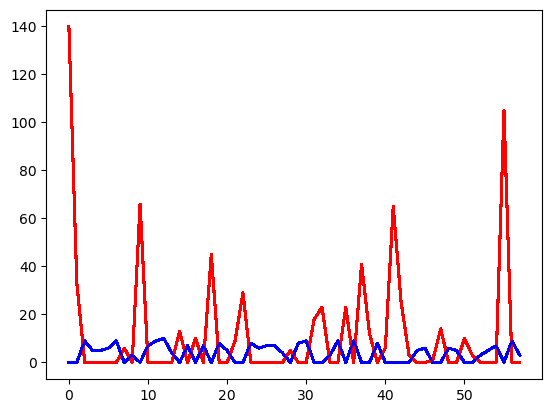

In [10]:
en = pd.read_csv("ipl_data.csv",index_col=['season','win_by_runs','win_by_wickets'])
matches=[]
win_by_runs=[]
win_by_wickets=[]
def func(season):
    for i,j in large_data.iterrows():
        if j['season'] == season:
            matches.append(i)
            win_by_runs.append(j['win_by_runs'])
            win_by_wickets.append(j['win_by_wickets'])
        plt.plot(matches,win_by_runs,'r')  
        plt.plot(matches,win_by_wickets,'b')   
        
func(2008)



* **Newton-Raphson method to find the root of a function**

    The root of a function $f(x)$ is defined as $x=\alpha$, such that $f(\alpha)=0$. The Newton-Raphson method helps find the root of a continuous function in an iterative manner. Starting with a guess $x_n$ for the root, it predicts a better guess $x_{n+1}$, where

    $$
    x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
    $$

    Here, $f'(x)$ is the numerical derivative of the function $f(x)$, given by

    $$
    f'(x) = \frac{df}{dx} = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
    $$

    **Find a function, that can be iteratively find the root of the function, $f(x) = \sin(x) + 3\cos(x)$, using the Newton-Raphson method upto an accuracy of $10^{-6}$, starting from an initial random guess $x_0 \in [0, \pi]$. The function takes $f(x)$, $x_0$ and $h$, as its arguments. The output of the function should be a tuple containing the approximate root of $f(x)$ and the number of iterations $n$ needed to find it.**

    **Hint: If the function is unable to find the root after a fixed number of iterations than you should restart it with a different initial guess.**

* **Using `matplotlib`, plot the function $f(x) = \sin(x) + 3\cos(x)$, in the range $x \in [0, 5\pi]$. Use atleast 1000 plot points. Compare this with the plot $f(x) = \cos(x)$.**

enter your initial approximation of x=1
enter the precision of the root=0.000001
the root of function is 2.204196487823336


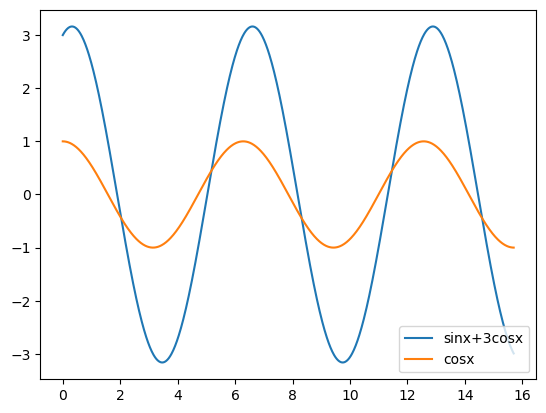

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import math
def f(x):
    y=np.sin(x)+3*(np.cos(x))
    return y
def df(x,h=0.05):
    f_prime=(f(x+h)-f(x))/h
    return f_prime
a=float(input("enter your initial approximation of x="))
E=float(input("enter the precision of the root="))
r=a-f(a)/df(a)
if (f(r)==0):
    print("the root of the function is",r)
else:
    r=a-f(a)/df(a)
    while (f(r)>=E):
        r=a-f(a)/df(a)
        a=r
    print("the root of function is", r)
    
x=np.linspace(0,5*3.14,1000)
plt.plot(x,f(x),label="sinx+3cosx")
plt.plot(x,np.cos(x),label="cosx")
plt.legend()
plt.show()


* **Integrate the function $f(x) = x^2$, using the trapezium and Monte-Carlo rule, between $x=2$ and $x=100$. Also, compare this with the `integrate.quad` function from SciPy.**

In [12]:
def f(x):
    return x**2
N = 100000
x_val = np.linspace(2,100,N)
dx = x_val[1]-x_val[0]
int_sum = sum([dx/2*(f(x_val[i])+f(x_val[i+1])) for i in range(len(x_val)-1)])
print ("The integration for x**2 using trapezoidal rule between 2 to 100 is",int_sum)

The integration for x**2 using trapezoidal rule between 2 to 100 is 333330.6666822929


In [13]:
from scipy import integrate
N = 100000
V = 100 - 2
x = np.random.uniform(2,100,N)  # we choose N points between 0 and 10
I = V/N*sum(f(x))
print ("The integration using Monte-Carlo for x**2 between 2 to 100 is",I)  # Check if this is correct
print ("The scipy integration is",integrate.quad(f,2,100))

The integration using Monte-Carlo for x**2 between 2 to 100 is 333555.8729927435
The scipy integration is (333330.6666666667, 3.7007138094698653e-09)


* **Using both trapezium and Monte-Carlo methods, integrate $x \log x$, between $x=0$ and $x=1$. Compare with exact and integrate.quad.**

In [14]:
def f(x):
    return x*(np.log(x))
N = 100000
x_val = np.linspace(0,1,N)
x_val = x_val[1:]
dx = x_val[1]-x_val[0]
int_sum = sum([dx/2*(f(x_val[i])+f(x_val[i+1])) for i in range(len(x_val)-1)])
print ("The integration using trapezoidal rule for xlogx between 0 to 1 is",int_sum)

The integration using trapezoidal rule for xlogx between 0 to 1 is -0.24999999930352323


In [15]:
from scipy import integrate
N = 100000
V = 1 - 0
x = np.random.uniform(0,1,N)  # we choose N points between 0 and 10
x=x[1:]
I = V/N*sum(f(x))
print ("The integration using Monte-Carlo for xlogx between 0 to 1 is",I)  # Check if this is correct
print ("The scipy integration is",integrate.quad(f,0,1))

The integration using Monte-Carlo for xlogx between 0 to 1 is -0.2496378800982089
The scipy integration is (-0.24999999999999992, 2.7755575615628904e-16)


* **Consider the Zassenhaus formula that is a successive approximation to the matrix exponent of $e^{t(A+B)}$. It is given by (to second order) by**

    $$
    e^{t(A+B)} = e^{tA} e^{tB} e^{-\frac{t^2}{2} [A,B]} [\ldots]
    $$

In [16]:
A = np.random.randint(5,size=(3, 3)) # Random array with shape (3,3) filled with integer elements from 0 to 5
print ('Matrix A is:\n', A,'\n')
B = np.random.randint(5,size=(3, 3)) # Random array with shape (3,3) filled with integer elements from 0 to 5
print ('Matrix B is:\n', B,'\n')
t=0.000001
from scipy import linalg as la
C=t*(A+B)
e_val, e_vec=la.eig(C)
C_diag=[[e_val[0],0,0],[0,e_val[1],0],[0,0,e_val[2]]]
exp_A=la.expm(C_diag)
D=t*A
e_val_D, e_vec_D=la.eig(D)
D_diag=[[e_val_D[0],0,0],[0,e_val_D[1],0],[0,0,e_val_D[2]]]
exp_D=la.expm(D_diag)
E=t*B
e_val_E, e_vec_E=la.eig(E)
E_diag=[[e_val_E[0],0,0],[0,e_val_E[1],0],[0,0,e_val_E[2]]]
exp_E=la.expm(E_diag)
F=(-t**2/2)*(A@B-B@A)
e_val_F, e_vec_F=la.eig(F)
F_diag=[[e_val_F[0],0,0],[0,e_val_F[1],0],[0,0,e_val_F[2]]]
exp_F=la.expm(F_diag)
G=(exp_D)*(exp_E)*(exp_F)
V=A*B
print(exp_A)
print(G)
print(A)
print(B)
print(V)

Matrix A is:
 [[3 3 2]
 [2 0 1]
 [2 4 3]] 

Matrix B is:
 [[4 3 3]
 [3 4 4]
 [2 1 1]] 

[[1.00001512+0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 1.00000103+0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.99999885+0.j]]
[[1.00001498+0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 1.00000145+0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.99999857+0.j]]
[[3 3 2]
 [2 0 1]
 [2 4 3]]
[[4 3 3]
 [3 4 4]
 [2 1 1]]
[[12  9  6]
 [ 6  0  4]
 [ 4  4  3]]


* **The composite Simpson's rule is a numerical integration technique that builds on the trapezoidal method. Here, the integration interval $[a, b]$ is divided into $n$ equal and even divisions (be careful here), such that the integration is given by,**

    $$
    \int_{a}^{b} f(x) dx \approx \frac{\Delta x}{3} \sum_{j \text{ even}}^{n-2} [f(x_j) + 4f(x_{j+1}) + f(x_{j+2})]
    $$

    $$
    = \frac{\Delta x}{3} [f(x_0) + 4 \sum_{j \text{ odd}}^{n-1} f(x_j) + 2 \sum_{j \text{ even}}^{n-2} f(x_j) + f(x_n)],
    $$

    where $\Delta x = x_{i+1} - x_i$, $\forall i \in [0, n]$. Write a function that implements the Simpson's method and integrate the function $f(x) = x^2 \log(x)$, between $x=1$ and $x=10$.

In [17]:
import numpy as np
def f(x):
    return (x**2)*(np.log(x))
n=10000
a=1
b=10
h=(b-a)/n
x=np.zeros((n))
sum1=f(a)+f(b)
for i in range(1,n):
    x[i]=a+i*h
    if i%2==0:
        sum1=sum1+2*f(x[i])
    else:
        sum1=sum1+4*f(x[i])
integral=h/3*(sum1)
print("integral using simpson for x**2logx from 1 to 10=",integral)
print ("The scipy integration is",integrate.quad(f,1,10))

integral using simpson for x**2logx from 1 to 10= 656.5283643313489
The scipy integration is (656.5283643313485, 2.427802370893051e-09)




Consider the quantum operator:
$$
\mathcal{H} = \frac{1}{2} (\sigma_x \otimes \sigma_x + \sigma_y \otimes \sigma_y) + \frac{1}{4} (\sigma_z \otimes I + I \otimes \sigma_z)
$$
where
$$
\sigma_x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \quad \sigma_y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \quad \text{and} \quad \sigma_z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
$$
and $I$ is the $2 \times 2$ identity matrix.

1.  **Write down the Hamiltonian $\mathcal{H}$.**
2.  **Find the eigenvalues and eigenvectors of $\mathcal{H}$.**
3.  **Show that $D = P^{-1} \mathcal{H} P$, where $D$ is the diagonal matrix containing the eigenvalues of $\mathcal{H}$ and $P$ is an invertible matrix formed by the eigenvectors.**

    Note that $P^{-1} = (P^\dag)^T$ as $P$ is unitary.



Time-evolution in quantum mechanics can be written as: $|\psi(t)\rangle = e^{-i\mathcal{H}t} |\psi(0)\rangle$.

Write a function to find $|\psi(t)\rangle$, with arguments $|\psi(0)\rangle$, $\mathcal{H}$, and time $t$.

Print the output for
$$
|\psi(0)\rangle = \frac{1}{\sqrt{2}} \left( \begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} + \begin{pmatrix} 0 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 0 \\ 1 \end{pmatrix} \right)
$$
and $t=0.1$.

In [18]:
import numpy as np
from scipy.linalg import expm
from scipy import linalg as la
sigma_x = np.array([[0, 1],
                    [1, 0]], dtype=complex)

sigma_y = np.array([[0, -1j],
                    [1j, 0]], dtype=complex)

sigma_z = np.array([[1, 0],
                    [0, -1]], dtype=complex)

I = np.eye(2, dtype=complex)

H = 0.5 * (np.kron(sigma_x, sigma_x) + np.kron(sigma_y, sigma_y)) \
    + 0.25 * (np.kron(sigma_z, I) + np.kron(I, sigma_z))

print("Hamiltonian 𝓗 =\n", H, "\n")
eigenvalues, eigenvectors = la.eig(H)   # eigh since H is Hermitian
print("Eigenvalues of 𝓗:")
print(eigenvalues)
print("\nEigenvectors of 𝓗 (columns of P):\n", eigenvectors, "\n")
P = eigenvectors
D = np.diag(eigenvalues)
P_inv = np.conjugate(P.T)   
reconstructed_D = P_inv @ H @ P
print("Verification (P† H P):\n", reconstructed_D, "\n")
def time_evolve(H, psi0, t):
    U = expm(-1j * H * t)
    return U @ psi0

psi_00 = np.kron(np.array([[1], [0]]), np.array([[1], [0]]))
psi_11 = np.kron(np.array([[0], [1]]), np.array([[0], [1]]))
psi0 = (psi_00 + psi_11) / np.sqrt(2)

t = 0.1
psi_t = time_evolve(H, psi0, t)

print(f"|ψ(0)> =\n{psi0}\n")
print(f"|ψ(t=0.1)> =\n{psi_t}\n")
norm = np.vdot(psi_t, psi_t)
print(f"Norm of |ψ(t)>: {norm:.6f}")


Hamiltonian 𝓗 =
 [[ 0.5+0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  1. +0.j  0. +0.j]
 [ 0. +0.j  1. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j -0.5+0.j]] 

Eigenvalues of 𝓗:
[ 1. +0.j -1. +0.j  0.5+0.j -0.5+0.j]

Eigenvectors of 𝓗 (columns of P):
 [[-0.        +0.j  0.        +0.j  1.        +0.j  0.        +0.j]
 [ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.70710678-0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]
 [-0.        +0.j  0.        +0.j  0.        +0.j  1.        +0.j]] 

Verification (P† H P):
 [[ 1.00000000e+00+0.j -1.56386917e-16+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]
 [-1.67155782e-16+0.j -1.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  5.00000000e-01+0.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  -5.00000000e-01+0.j]] 

|ψ(0)> =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]

|ψ(t=0.1)> =
[[0.70622308-0

###  1D Ising Model 
Problem 1.1: **1D Ising Model** The Hamiltonian is $H = -J \sum_{i=1}^N s_i s_{i+1}$, where $s_i = \pm 1$. For $N=8$, calculate the energy for the configurations $(1, 1, \ldots, 1)$ and $(1, -1, 1, \ldots)$. Then, find the true ground state energy by checking all $2^8 = 256$ states.

#### The Ising Model

* **The Model:** A simple model for magnetism. Each 'spin' $s_i$ can be up (+1) or down (-1).
* **The Hamiltonian $H$:** This is just a function that tells you the total energy of a given configuration.
* **The $J$ term:** $J$ is the 'coupling' constant.
    * $J > 0$ (ferromagnet): The energy is lowest when spins align $(s_i s_{i+1}=1)$. E.g., $(+1, +1)$ or $(-1, -1)$.
    * $J < 0$ (antiferromagnet): The energy is lowest when spins anti-align $(s_i s_{i+1}=-1)$. E.g., $(+1, -1)$.
* **Ground State:** The configuration of spins with the **lowest possible energy** $H$. For $J=1$, we expect this to be all spins aligned: $(+1, +1, \ldots)$ or $(-1, -1, \ldots)$.
* **The Task:** We are given $J=1$ (ferromagnet).
* **Note:** This is the **Classical** Ising Model. The spins $s_i$ are just numbers $(\pm 1)$. Later, we will see the **Quantum** Ising Model, where the spins $s_i$ are replaced by quantum operators ($\sigma_x, \sigma_z$), and the system can exist in a superposition of states.
* **'How?'**: We don't want to write 8 nested for loops. We use `itertools.product`. `itertools.product((-1, 1), repeat=8)` generates all 256 possible tuples.

In [20]:
import itertools
def calculate_ising_energy(config, J):
    E = 0
    for i in range(len(config)- 1):
        E += config[i] * config[i+1]
        return -J * E
J = 1
config_all_up = (1, 1, 1, 1, 1, 1, 1, 1)
config_alt = (1,-1, 1,-1, 1,-1, 1,-1)
E_up = calculate_ising_energy(config_all_up, J)
E_alt = calculate_ising_energy(config_alt, J)
print("--- Specific State Energies (J=1)---")
print(f"Energy of {config_all_up}: {E_up}")
print(f"Energy of {config_alt}: {E_alt}")
print("\nFinding ground state by checking all 2^8=256 states...")
N = 8
J = 1
#Generate all 256 states
all_configs = itertools.product([-1, 1], repeat=N)
# Keep track of the minimum energy found so far
min_energy = float('inf') # Start with infinity
ground_states = [] # There might be more than one!
for config in all_configs:
    E = calculate_ising_energy(config, J)
    if E < min_energy:
        min_energy = E
        ground_states = [config] # Start a new list
    elif E == min_energy:
        ground_states.append(config)
print(f"\n--- Ground State Search (J=1)---")
print(f"Ground State Energy: {min_energy}")
print(f"Number of Ground States: {len(ground_states)}")
print("The ground states are:")
for gs in ground_states:
    print(gs)

--- Specific State Energies (J=1)---
Energy of (1, 1, 1, 1, 1, 1, 1, 1): -1
Energy of (1, -1, 1, -1, 1, -1, 1, -1): 1

Finding ground state by checking all 2^8=256 states...

--- Ground State Search (J=1)---
Ground State Energy: -1
Number of Ground States: 128
The ground states are:
(-1, -1, -1, -1, -1, -1, -1, -1)
(-1, -1, -1, -1, -1, -1, -1, 1)
(-1, -1, -1, -1, -1, -1, 1, -1)
(-1, -1, -1, -1, -1, -1, 1, 1)
(-1, -1, -1, -1, -1, 1, -1, -1)
(-1, -1, -1, -1, -1, 1, -1, 1)
(-1, -1, -1, -1, -1, 1, 1, -1)
(-1, -1, -1, -1, -1, 1, 1, 1)
(-1, -1, -1, -1, 1, -1, -1, -1)
(-1, -1, -1, -1, 1, -1, -1, 1)
(-1, -1, -1, -1, 1, -1, 1, -1)
(-1, -1, -1, -1, 1, -1, 1, 1)
(-1, -1, -1, -1, 1, 1, -1, -1)
(-1, -1, -1, -1, 1, 1, -1, 1)
(-1, -1, -1, -1, 1, 1, 1, -1)
(-1, -1, -1, -1, 1, 1, 1, 1)
(-1, -1, -1, 1, -1, -1, -1, -1)
(-1, -1, -1, 1, -1, -1, -1, 1)
(-1, -1, -1, 1, -1, -1, 1, -1)
(-1, -1, -1, 1, -1, -1, 1, 1)
(-1, -1, -1, 1, -1, 1, -1, -1)
(-1, -1, -1, 1, -1, 1, -1, 1)
(-1, -1, -1, 1, -1, 1, 1, -1)
(-1, 

### Transverse Ising Model

Consider the 1D Transverse Ising Model (TIM) for a chain of $N$ spins, described by the Hamiltonian
$$
\mathcal{H} = -J \sum_{i=1}^N \sigma_x^{(i)} \sigma_x^{(i+1)} - h \sum_{i=1}^N \sigma_z^{(i)}
\tag{1}
$$
where the Pauli matrices are given by:
$$
\sigma_x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \quad \sigma_y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \quad \sigma_z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
\tag{2}
$$
The operators acting on site $i$ are defined as:
$$
\sigma_\alpha^{(i)} = I_1 \otimes I_2 \otimes \ldots \otimes \sigma_\alpha \otimes \ldots \otimes I_N
\tag{3}
$$
and for nearest-neighbor interactions:
$$
\sigma_x^{(i)} \sigma_x^{(i+1)} = I_1 \otimes \ldots \otimes \sigma_x \otimes \sigma_x \otimes \ldots \otimes I_N
\tag{4}
$$

**Question 1: Construct the Hamiltonian**

1.  Construct the full Hamiltonian matrix $\mathcal{H}$ for $N=4$ spins using Kronecker products (`np.kron` in Python). (Take $J=1.0$ and $h=0.5$.)
2.  Diagonalize the Hamiltonian numerically using `np.linalg.eig(H)`.

**Question 2: Finding the Ground State Energy using the Power Method**

In this question, you will estimate the ground state energy of the same Transverse Ising Hamiltonian constructed in **Question 1** using the **Power Method**.

**Algorithm**
Follow the steps below to implement the Power Method:

1.  Initialize a random normalized state of size $2^N$.
2.  To find ground state (lowest energy), define:
    $$
    \mathcal{H}^\prime = \mathcal{H} - \lambda I
    \tag{5}
    $$
    where $\lambda$ is a constant slightly larger than the maximum eigenvalue of $\mathcal{H}$. Repeating the above process on $\mathcal{H}^\prime$ makes the ground state dominate.
3.  Iterative update: Apply the Hamiltonian repeatedly:
    $$
    |\psi_{n+1}\rangle = \mathcal{H}^\prime |\psi_n\rangle
    \tag{6}
    $$
    After each step, normalize the new state.
4.  Compute the energy expectation of each step:
    $$
    E_n = \langle \psi_n | \mathcal{H} | \psi_n \rangle
    \tag{7}
    $$
5.  Iterate the above process and stop when $|E_{n+1} - E_n| < 10^{-6}$. Print the ground state energy.

In [21]:
import numpy as np
from scipy.linalg import orth

sx = np.array([[0, 1], [1, 0]], dtype=complex)
sz = np.array([[1, 0], [0, -1]], dtype=complex)
I = np.eye(2, dtype=complex)


def kron_n(mat_list):
    result = mat_list[0]
    for m in mat_list[1:]:
        result = np.kron(result, m)
    return result

def H_transverse_ising(N, J=1.0, h=1):
    H = np.zeros((2**N, 2**N), dtype=complex)
    for i in range(N - 1):
        ops = [I]*N
        ops[i] = sx
        ops[i+1] = sx
        H -= J * kron_n(ops)
    for i in range(N):
        ops = [I]*N
        ops[i] = sz
        H -= (h) * kron_n(ops)
    return H

Hamiltonian=H_transverse_ising(10)    
print(Hamiltonian)
 

[[-10.+0.j   0.+0.j   0.+0.j ...   0.+0.j   0.+0.j   0.+0.j]
 [  0.+0.j  -8.+0.j  -1.+0.j ...   0.+0.j   0.+0.j   0.+0.j]
 [  0.+0.j  -1.+0.j  -8.+0.j ...   0.+0.j   0.+0.j   0.+0.j]
 ...
 [  0.+0.j   0.+0.j   0.+0.j ...   8.+0.j  -1.+0.j   0.+0.j]
 [  0.+0.j   0.+0.j   0.+0.j ...  -1.+0.j   8.+0.j   0.+0.j]
 [  0.+0.j   0.+0.j   0.+0.j ...   0.+0.j   0.+0.j  10.+0.j]]


In [22]:
a,b=np.linalg.eigh(Hamiltonian)

In [23]:
phi_0 = np.random.rand(2**10)
v = phi_0/(np.dot(phi_0,phi_0))**0.5
v
E0=np.transpose(v)@Hamiltonian@v
E0

(-6.732650153755382+0j)

In [24]:
print(min(a)/10)

-1.2381489999654753


In [25]:
I_1=np.eye(2**10)
H=100*I_1-Hamiltonian
print(H)


[[110.+0.j   0.+0.j   0.+0.j ...   0.+0.j   0.+0.j   0.+0.j]
 [  0.+0.j 108.+0.j   1.+0.j ...   0.+0.j   0.+0.j   0.+0.j]
 [  0.+0.j   1.+0.j 108.+0.j ...   0.+0.j   0.+0.j   0.+0.j]
 ...
 [  0.+0.j   0.+0.j   0.+0.j ...  92.+0.j   1.+0.j   0.+0.j]
 [  0.+0.j   0.+0.j   0.+0.j ...   1.+0.j  92.+0.j   0.+0.j]
 [  0.+0.j   0.+0.j   0.+0.j ...   0.+0.j   0.+0.j  90.+0.j]]


In [26]:
phi=H@(v)
phi_N=phi/(np.dot(phi,phi))**0.5
energy2=np.transpose(v)@H@v
#energy=np.transpose(v)@H@v
print(energy2)
#v=phi_N

(106.73265015375537+0j)


In [27]:
phi=H@(v)
phi_N=phi/(np.dot(phi,phi))**0.5
E1=np.transpose(v)@H@v
E2=E0
while abs(E2-E1)>10**-7:
    E2=E1
    v2=H@(phi_N)
    v2=v2/(np.dot(v2,v2))**0.5
    E3=np.transpose(v2)@H@v2
    E1=E3
    phi_N=v2
    #energy=np.transpose(v)@H@v
    #v=phi_N
print(E1)    
print("ground state=",100-E1)    
    

(112.38147128934551+0j)
ground state= (-12.381471289345512+0j)


### Open Quantum System Dynamics

In quantum mechanics, the state of a system is described by a **density operator** $\rho(t)$.

For a **closed system** that evolves in isolation (no interaction with the environment), the time evolution of $\rho(t)$ is given by the von Neumann-Liouville equation:

$$
\frac{d\rho}{dt} = -i[\mathcal{H}, \rho]
\tag{8}
$$

Here $\mathcal{H}$ is the Hamiltonian of the system, and $\rho(t) = e^{-i\mathcal{H}t} \rho(0) e^{i\mathcal{H}t}$ with $D(t) = e^{i\mathcal{H}t}$.

In reality, most systems are **open**, meaning they interact with an external environment or bath.

The total system (system + bath) is still unitary, but when we trace out the environment's degrees of freedom, the system itself evolves **non-unitarily**.

The dynamics of such an open system can be written in the **Lindblad master equation** form:

$$
\frac{d\rho}{dt} = -i[\mathcal{H}_{\text{eff}}, \rho] + \sum_k \left( \mathcal{L}_k \rho \mathcal{L}_k^\dag - \frac{1}{2} \{ \mathcal{L}_k^\dag \mathcal{L}_k, \rho \} \right)
\tag{9}
$$

In this equation, $\mathcal{H}_{\text{eff}}$ is the **effective system Hamiltonian** and $\mathcal{L}_k$ are the **Lindblad operators** (or jump operators), representing different dissipative channels such as spontaneous emission, dephasing, or absorption. $\gamma_k$ are the decay rates associated with each process, and $\mathcal{L}_k = \sqrt{\gamma_k} A_k$, where $A_k$ are the unitary operators.

The first term describes the **coherent (unitary)** part of the evolution, while the second term (the **dissipator**) accounts for **irreversible processes** due to its coupling with the environment.

**Question : Solve the Lindblad master equation**

Solve the Lindblad master equation for the Hamiltonian $\mathcal{H} = \mathcal{H}_S$, and the jump operator $\mathcal{L} = \mathcal{S}_-$, where $\mathcal{S}_- = \sigma_- \otimes \sigma_-$ for $N=5$.

Note that `scipy` only takes vectors and not matrices. Use `np.flatten()` to convert a matrix (A) to a vector and $\mathcal{M}(\text{vector}(\text{A}))$ to reshape it back to a matrix.

**Question : Plot the expectation value**

Plot the expectation value of $\mathcal{S}_z = \text{trace}(\mathcal{S}_z \rho)$ as a function of time for $\mathcal{H} = \Omega$ and $\Omega = 0.5$. Set $\gamma = 1$.

In [30]:
from scipy.integrate import solve_ivp
from scipy import linalg as la


N=5
w=5
h=1
gamma=1
s_= np.array([(0,0),(1,0)])

def S(s,N):
    for i in range(N):
        ops = [I]*N
        ops[i] = s
    return kron_n(ops)
    
L1= S(s_,N)

H = w*S(sx,N)

def ac(a,b):
    return a@b + b@a

def c(a,b):
    return a@b - b@a

    
def f(t,p):
    p=p.reshape(2**N,2**N)
    dpdt= -1j*c(H,p)/h + gamma*(L1@p@np.conj(L1.T)) - 0.5*(ac((np.conj(L1.T))@ L1, p))
    return dpdt.flatten()


yi= np.zeros((2**N,2**N))
yi[0][0]=1 
yi=yi.flatten()

t= np.linspace(0, 4, 100)
sol= solve_ivp(f, t_span=[0,4], y0=yi , t_eval=t)

print(sol)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  4.040e-02 ...  3.960e+00  4.000e+00]
        y: [[ 1.000e+00  9.604e-01 ...  2.003e-02  1.925e-02]
            [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
            ...
            [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
            [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 38
     njev: 0
      nlu: 0


C:\Users\thedy\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


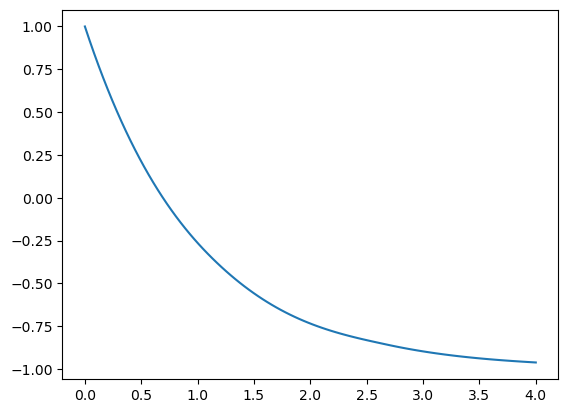

In [29]:
import matplotlib.pyplot as plt
sz=np.array([(1,0),(0,-1)])

a=[]
for i in range(len(t)):
    p=sol.y[:,i]
    p=p.reshape(2**N,2**N)
    a.append(np.trace(S(sz,N)@ p))
    
plt.plot(t,a)
